# Heart Disease Prediction


In [1]:
### Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
### Importing the dataset
df = pd.read_csv('C:/Users/sanji/OneDrive/ドキュメント/Heart_Disease_Prediction.csv')

In [8]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [9]:
# how many columns and rows in dataframe
df.shape

(270, 14)

In [10]:
# quick view of columns and values
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [11]:
# To check any missing values is there or not
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [68]:
#Finalizing there is no null values in rows
df[df.isna().any(axis=1)]

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium,Heart_Disease


In [12]:
# To check any duplicate values
format(len(df[df.duplicated()]))

'0'

Findings


no missing values,
no duplicate values and 
Some of the categorical variables (Sex, Chest Pain Type) are represented in numeric form

In [15]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [37]:
df.columns=df.columns.str.replace(' ','_')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [17]:
df.columns.values

array(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro',
       'Thallium', 'Heart Disease'], dtype=object)

# EDA - Esploratory Data Analysis

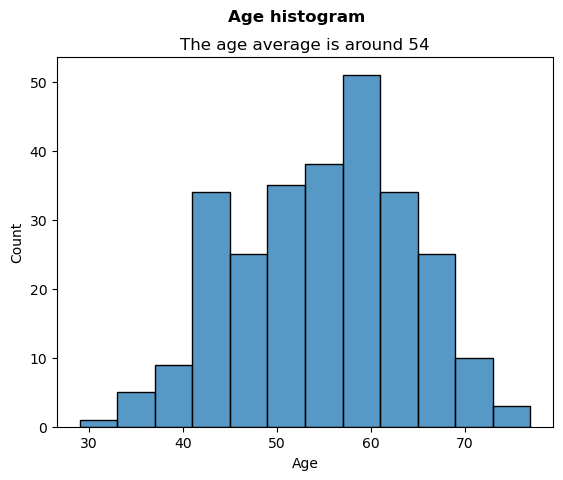

In [18]:
plt.suptitle('Age histogram', fontweight='heavy')
plt.title('The age average is around 54')
sns.histplot(data=df, x='Age')
plt.show()

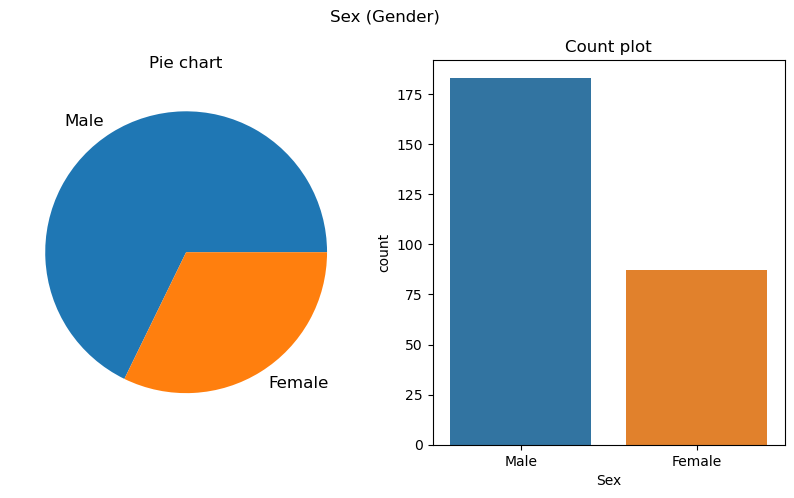

Sex
1    183
0     87
Name: count, dtype: int64
It can be noticed that predictor (Gender) is imbalance


In [19]:
labels = ['Male', 'Female']
order = df['Sex'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Sex (Gender)")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Sex'].value_counts(), labels=labels, textprops={'fontsize':12})

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Sex', data=df, order=order)
plt.xticks([0, 1], labels)

plt.show()

print(df['Sex'].value_counts())
print("It can be noticed that predictor (Gender) is imbalance")

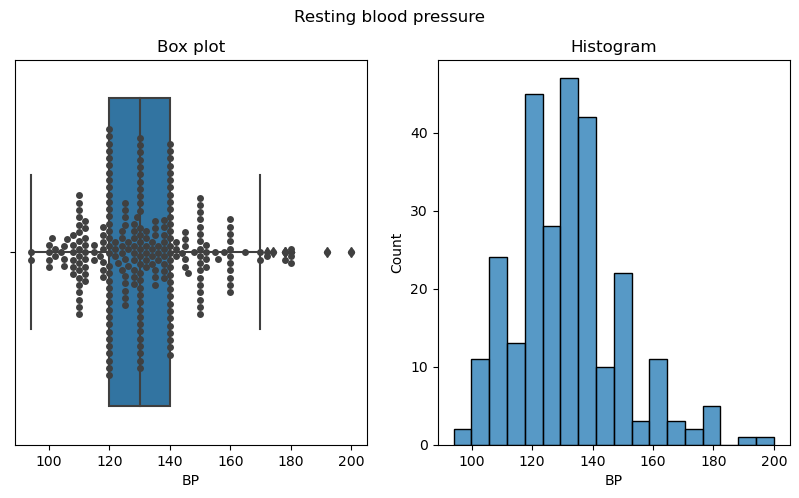

The average resting heart rate: 131.34 It can be observed that histogram is skewed to right side


In [20]:
plt.figure(figsize=(10,5))
plt.suptitle("Resting blood pressure")

plt.subplot(1,2,1)
plt.title('Box plot')
sns.boxplot(x="BP", data=df)
sns.swarmplot(x="BP", data=df, color=".25")

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='BP', data=df)
plt.show()

print("The average resting heart rate: %2.2f It can be observed that histogram is skewed to right side" % (df["BP"].mean()))

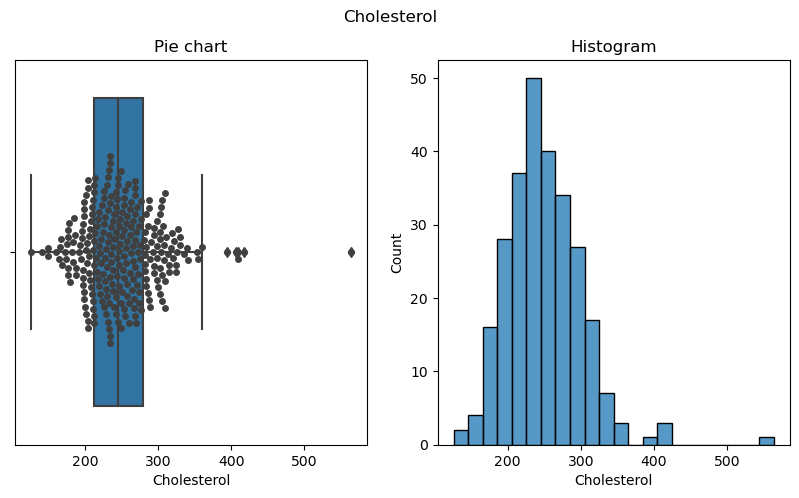

The average resting heart rate: 249.66. The shape of histogram resamble a normal distribution


In [21]:
plt.figure(figsize=(10,5))
plt.suptitle("Cholesterol")

plt.subplot(1,2,1)
plt.title('Pie chart')
sns.boxplot(x="Cholesterol", data=df)
sns.swarmplot(x="Cholesterol", data=df, color=".25")

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='Cholesterol', data=df)
plt.show()

print("The average resting heart rate: %2.2f. The shape of histogram resamble a normal distribution" % (df["Cholesterol"].mean()))

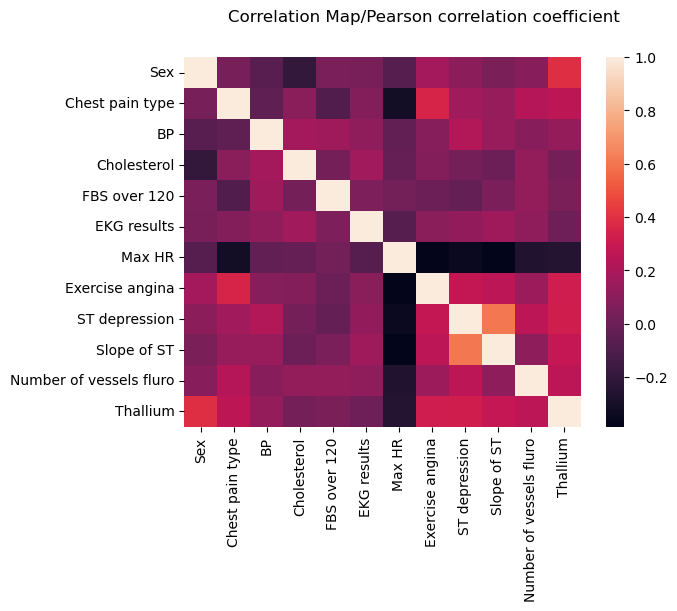

In [22]:
plt.suptitle("Correlation Map/Pearson correlation coefficient")
sns.heatmap(df.iloc[:,1:-1].corr())

plt.show()

Heart disease based on Gender - It can be observe that males have more opportunities to have heart disease than female

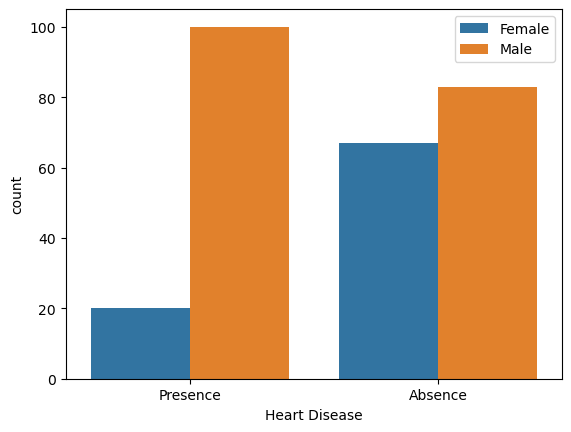

In [23]:
ax = sns.countplot(x='Heart Disease', hue='Sex', data=df)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Female','Male'], bbox_to_anchor=(1,1))
plt.show()

Heart disease based on Chest pain type - 4th type of chest pain dominate in heart disease

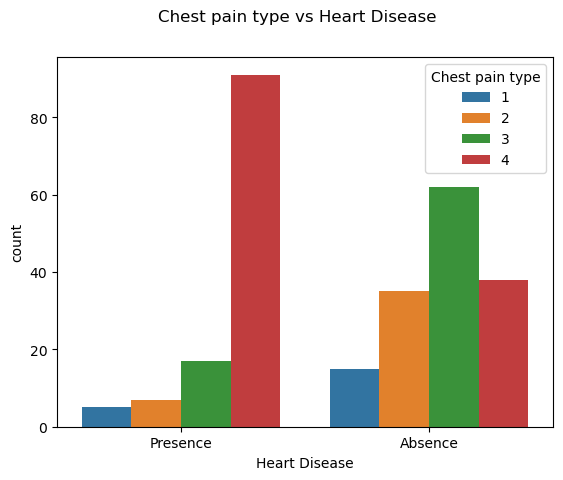

In [24]:
plt.suptitle('Chest pain type vs Heart Disease')
sns.countplot(data=df, x='Heart Disease', hue='Chest pain type')
plt.show()

FBS over 120 - Also increased FBS over 120 does not imply on heart disease prediction

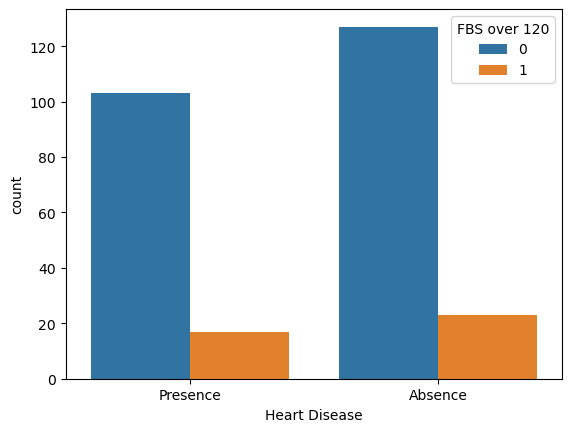

In [25]:
ax = sns.countplot(x='Heart Disease', hue='FBS over 120', data=df)
plt.show()

EKG results - The 2nd value of EKG could influence on heart disease prediction

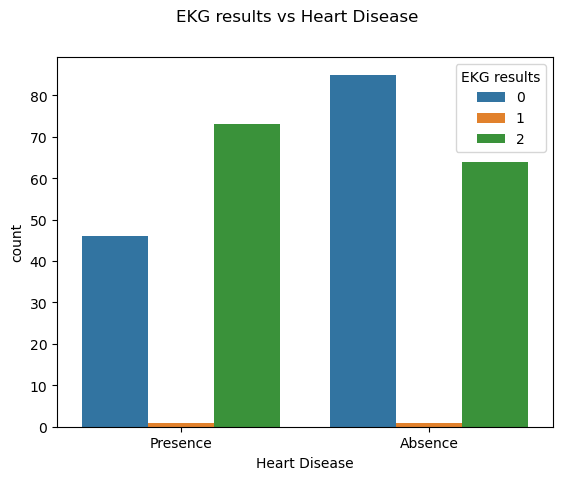

In [26]:
plt.suptitle('EKG results vs Heart Disease')
sns.countplot(data=df, x='Heart Disease', hue='EKG results')
plt.show()

# Develop and Evaluate the model

Now we move to the next steps where we develop the models and evaluate their performance. Here, we need to understand three concepts: Machine Language Alogrithm, Feature Selection, Resampling and Performance Metrics.

# Machine Learning Alogrithm

A machine learning algorithm is the method by used to conduct the specified task, generally predicting output values from given input data. In this problem solving, we are applying classification method (both linear and non-linear) from supervised machine learning alogrithms and selecting the best performing.

# Feature Selection

Feature selection is the process of subsetting the overall features such that only the features with significant impact on target variables are included in the model. This will help to build a model that is simple, however, the accuracy is not compromised.

# Encoding of Categorical Columns

In [38]:
df['Heart_Disease']=df.Heart_Disease.map({'Presence':1,'Absence':2})

# Data Preprocessing

In [40]:
#Separating Independent and Dependent Features
x=df.drop(['Heart_Disease'],axis=1)
y=df['Heart_Disease']

In [41]:
#Training the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1234)

Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

predicted = lr.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, predicted))
r2 = r2_score(y_test, predicted)

print('Root mean squared error: ', RMSE)
print("r2: ", r2)

Root mean squared error:  0.35708497269871486
r2:  0.4796543043934205


Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
logit = LogisticRegression()
logit.fit(X_train, y_train)

predicted_logit = logit.predict(X_test)

LogisticRegressionScore = accuracy_score(predicted_logit, y_test)
print("Logistic Regression score: ", LogisticRegressionScore)

Logistic Regression score:  0.8444444444444444


C:\Users\sanji\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Gaussian Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB()
gauss.fit(X_train, y_train)

gauss_pred = gauss.predict(X_test)

gauss_score = accuracy_score(gauss_pred, y_test)


print("Gaussian Naive Bayes score: ", gauss_score)

Gaussian Naive Bayes score:  0.8518518518518519


KNeighborsClassifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier


KNC = KNeighborsClassifier(n_neighbors=2)
KNC.fit(X_train, y_train)

KNC_pred = KNC.predict(X_test)

KNC_accuracy = metrics.accuracy_score(y_test, KNC_pred)

print("KNeighbourClassifier score: ", KNC_accuracy)

KNeighbourClassifier score:  0.6222222222222222


Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

rnd_clf_pred = rnd_clf.predict(X_test)

rnd_clf_accuracy = metrics.accuracy_score(y_test, rnd_clf_pred)
print("RandomForest score: ", rnd_clf_accuracy)

RandomForest score:  0.8074074074074075


Bagging Decision Tree

In [55]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500, oob_score=True,
    max_samples=100, bootstrap = True, n_jobs=-1)

bag_clf.fit(X_train, y_train)

bag_clf_oob = bag_clf.oob_score_

bag_clf_pred = bag_clf.predict(X_test)
bag_clf_accuracy = metrics.accuracy_score(y_test, bag_clf_pred)
print("Bagging Decision Tree score: ", bag_clf_accuracy, "Out of the bag: ", bag_clf_oob)

Bagging Decision Tree score:  0.7925925925925926 Out of the bag:  0.8148148148148148


Hard Voting Classifier

In [56]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators = [('gauss',gauss), ('logit', logit), ('KN', KNC), ('bag', bag_clf), ("rnd_clf", rnd_clf)], 
    voting = 'soft'
)

voting_clf.fit(X_train, y_train)

voting_clf_pred = bag_clf.predict(X_test)
voting_clf_accuracy = metrics.accuracy_score(y_test, voting_clf_pred)
print("Voting Classifier score: ", voting_clf_accuracy)

C:\Users\sanji\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier score:  0.7925925925925926


# Model's accuracy

In [65]:
data = {'Estimators':['Linear Regression', 
                      'Logistic Regression', 
                      'Gaussian Naive Bayes', 
                      'K-Nearest Neighbor', 
                      'Random Forest', 
                      'Bagging Decision Tree', 
                      "Hard Voting classifier"],
        "Accuracy":[r2,
                    LogisticRegressionScore,
                    gauss_score,
                    KNC_accuracy,
                    rnd_clf_accuracy,
                    bag_clf_accuracy,
                    voting_clf_accuracy]
        }
data = pd.DataFrame(data)
data.sort_values('Accuracy', ascending=False)

,Estimators,Accuracy
2,Gaussian Naive Bayes,0.851852
1,Logistic Regression,0.844444
4,Random Forest,0.807407
5,Bagging Decision Tree,0.792593
6,Hard Voting classifier,0.792593
3,K-Nearest Neighbor,0.622222
0,Linear Regression,0.479654


C:\Users\sanji\AppData\Local\Temp\ipykernel_9996\3231786778.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


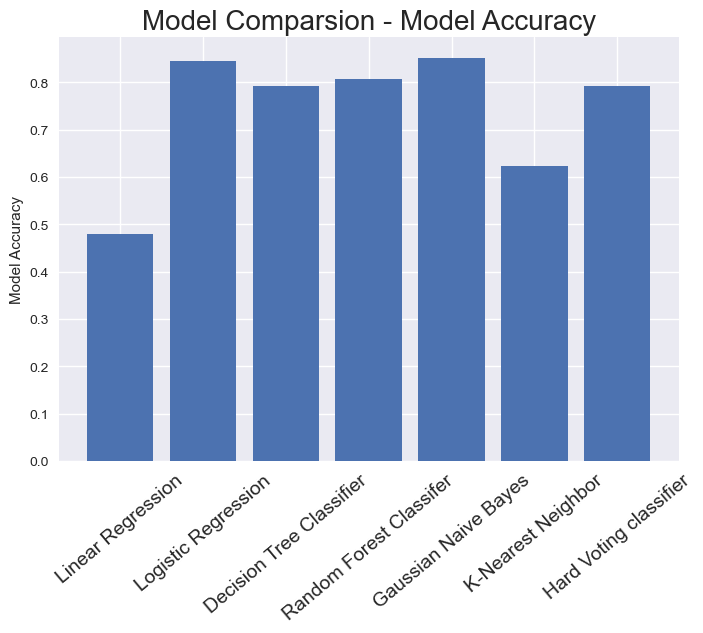

In [66]:
plt.style.use('seaborn')
x=['Linear Regression','Logistic Regression','Decision Tree Classifier','Random Forest Classifer','Gaussian Naive Bayes'
   ,'K-Nearest Neighbor','Hard Voting classifier']
y=[r2,LogisticRegressionScore,bag_clf_accuracy,rnd_clf_accuracy,gauss_score,KNC_accuracy,voting_clf_accuracy]
plt.bar(x,y)
plt.ylabel('Model Accuracy')
plt.xticks(rotation=40,fontsize=14)
plt.title('Model Comparsion - Model Accuracy',fontsize=20)
plt.show()

conclusion:

It seems that Gaussian Naive Bayes seem to perform the best with 85.1% accuracy to predict presence of lung cancer on the given dataset.